# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
# Importando as bibliotecas que serão utilizadas.

import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
# Importando a base de dados e calculando as variáveis que serão utilizadas.

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# Aqui uso o modelo de regressão linear simples pelo stats models, como realizado em aula.

reg = smf.ols('tip ~ net_bill', data = tips).fit()

In [4]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           5.02e-23
Time:                        13:26:47   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

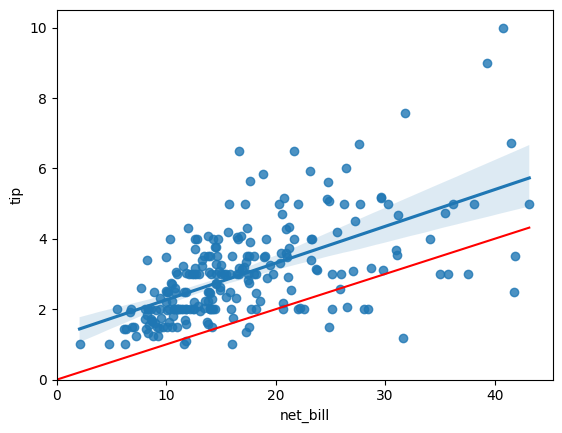

In [5]:
# Plot do gráfico de dispersão das gorgetas e do valor líquido.

sns.regplot(y = 'tip', x = 'net_bill', data=tips[tips['tip_pct']<.5])

x= np.linspace(0, tips['net_bill'].max(), 100)
y = .1 * x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left=0)
plt.ylim(bottom=0)

In [20]:
reg.predict(dados_novos)

0    2.918050
1    2.192915
2    3.070031
3    3.354125
4    3.414719
dtype: float64

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [6]:
# Aqui uso o modelo de regressão linear simples pelo stats models, usando como variáveis tip_pct e net_bill.

reg_1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()

In [7]:
# Usando o summary() é possível observar os resultados da regressão linear.

reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.52e-06
Time:                        13:27:47   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.5201973768115943)

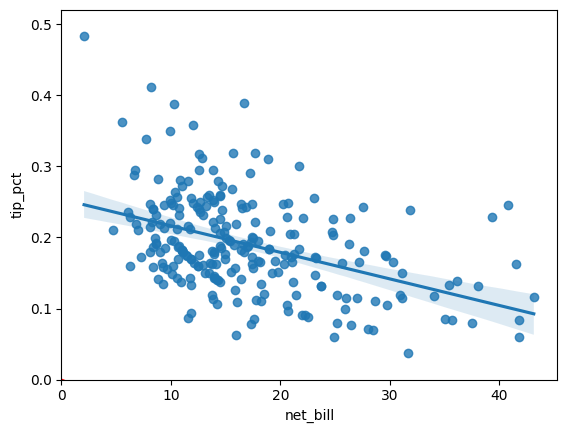

In [17]:
# Plot do gráfico da tip_pct e net_bill.

sns.regplot(y = 'tip_pct', x = 'net_bill', data=tips[tips['tip_pct']<.5])

x= np.linspace(0, tips['net_bill'].max(), 100)
y = -.006 * x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left=0)
plt.ylim(bottom=0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

**Resposta:**

Comparando os dois gráficos observa-se que o primeiro apresenta uma correlação positiva entre a gorgeta e conta líquida. Já no segundo verifica-se uma correlação negativa, entre as variáveis tip_pct e net_bill.

Ou seja, em contas mais mais caras o valor absoluto da gorgeta aumenta, contudo seu percentual em relação ao valor liquido diminui. Então, em contas mais caras as pessoas pagam apenas a gorgeta de 10%, enquanto em contas mais baratas as pessoas acabam pagando mais de 10% de gorgeta.

Se compararmos os R² verificaremos que o primeiro modelo se ajusta um pouco a variabilidade dos dados, enquanto o segundo, o modelo praticamente não se ajusta a variação dos dados.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 2, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [32]:
# Usando o fittedvalues obtenho o valor esperado para todas as linhas no banco de dados.

previsto = reg_1.fittedvalues

In [33]:
previsto

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [36]:
# Criei uma nova variável no banco de dados chamada tip_1, que seria o valor esperado da gorgeta assumindo o modelo produzido no item 2.

tips['tip_1'] = tips['net_bill'] * previsto

In [37]:
reg_2 = smf.ols('tip_1 ~ net_bill', data = tips).fit()

In [39]:
# Comparando o R² obtido a partir do modelo do item 2 com o R² do item 1 verifica-se um valor menor. Isso significa que o modelo explica menos a variabilidade dos dados de resposta, em relação ao primeiro.

reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tip_1   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     99.74
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           6.88e-20
Time:                        14:05:48   Log-Likelihood:                -192.63
No. Observations:                 244   AIC:                             389.3
Df Residuals:                     242   BIC:                             396.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2819      0.079     28.704      0.000       2.125       2.438
net_bill       0.0427      0.004      9.987      0.000       0.034       0.051
==============================================================================
Omnibus:                       97.034   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.025
Skew:                          -1.782   Prob(JB):                     5.74e-62
Kurtosis:                       6.878   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""